<a href="https://colab.research.google.com/github/Krish-Bali/Pytorch-learning/blob/main/linear_model_using_linearreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))


  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")


  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:

    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")


  plt.legend(prop={"size": 14});

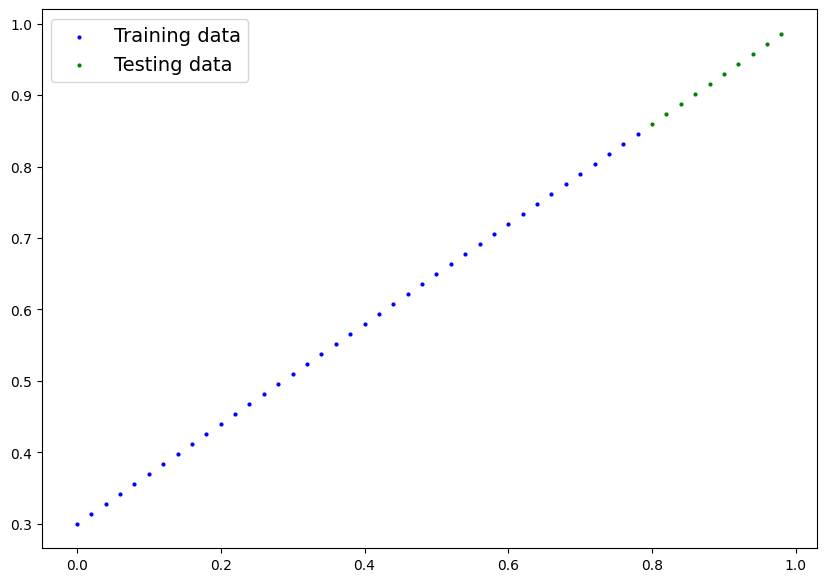

In [ ]:
plot_predictions();

In [ ]:
import torch.nn as nn

In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): #
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float),
                                   requires_grad=True)

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [ ]:

torch.manual_seed(42)

)
model_0 = LinearRegressionModel()


list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:

with torch.inference_mode():
    y_preds = model_0(X_test)

In [ ]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


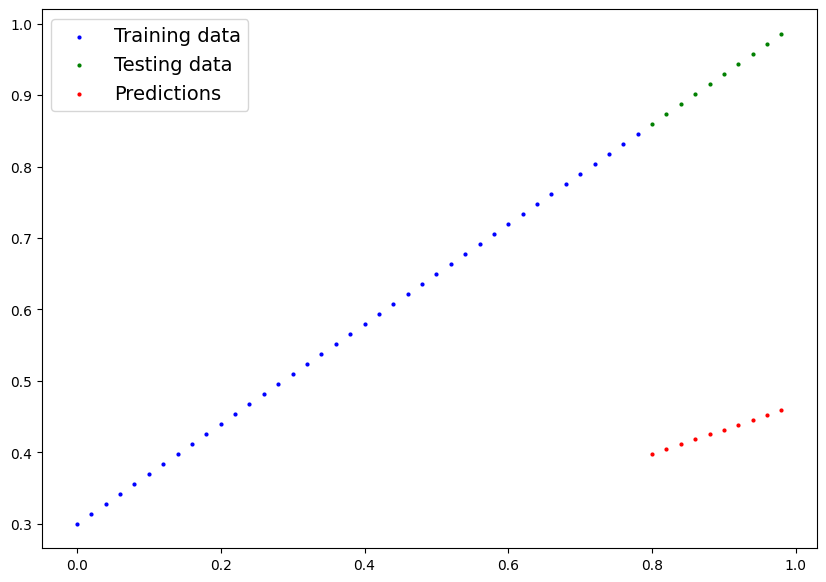

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test-y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
import torch

In [ ]:
torch.manual_seed(42)


epochs = 100


train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()


    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)


    optimizer.zero_grad()


    loss.backward()


    optimizer.step()


    model_0.eval()

    with torch.inference_mode():

      test_pred = model_0(X_test)

      test_loss = loss_fn(test_pred, y_test.type(torch.float))
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.024110013619065285 | MAE Test Loss: 0.05536102131009102 
Epoch: 10 | MAE Train Loss: 0.020677709951996803 | MAE Test Loss: 0.04777535796165466 
Epoch: 20 | MAE Train Loss: 0.017245199531316757 | MAE Test Loss: 0.0395028181374073 
Epoch: 30 | MAE Train Loss: 0.013806397095322609 | MAE Test Loss: 0.031230276450514793 
Epoch: 40 | MAE Train Loss: 0.010375778190791607 | MAE Test Loss: 0.023644620552659035 
Epoch: 50 | MAE Train Loss: 0.006941580679267645 | MAE Test Loss: 0.0153720797970891 
Epoch: 60 | MAE Train Loss: 0.0035027749836444855 | MAE Test Loss: 0.007099539041519165 
Epoch: 70 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 80 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 
Epoch: 90 | MAE Train Loss: 0.0025885067880153656 | MAE Test Loss: 0.008447891101241112 


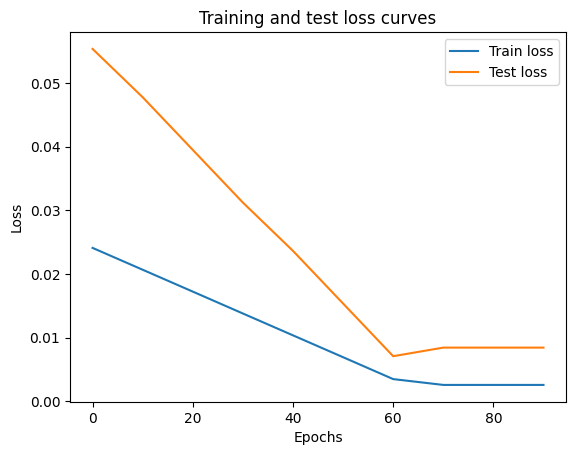

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:

model_0.eval()


with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

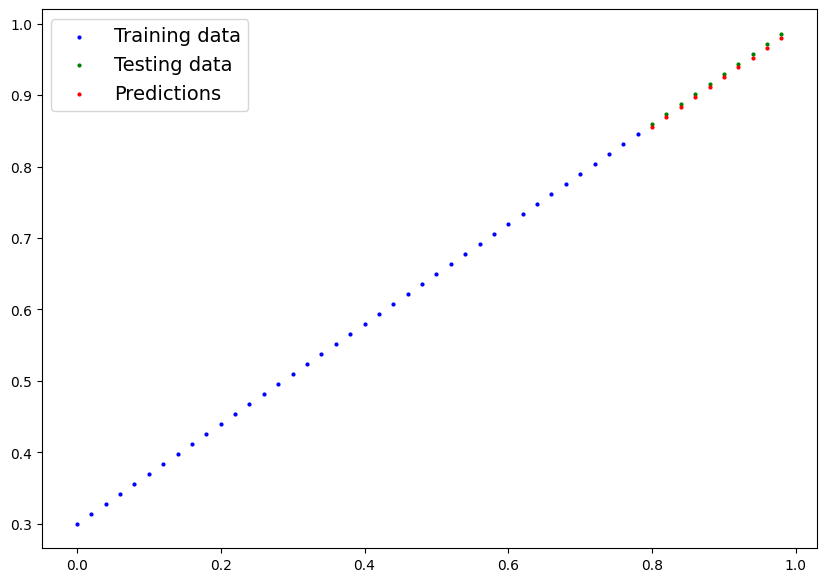

In [ ]:
plot_predictions(predictions=y_preds)